In [2]:
def linestyle_generator():
    linestyle = ["-","--","-.",";"]
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=":")
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both",ls=":")
    fig_ax[0].set_ylabel("Gain [dB]")

    fig_ax[1].grid(which="both",ls=":")
    fig_ax[1].set_xlabel("$\omega$ [rad/s]")
    fig_ax[1].set_ylabel("Phase [deg]")

    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
from control.matlab import*
import matplotlib.pyplot as plt
import numpy as np

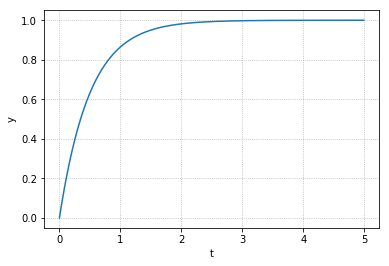

In [6]:
T, K = 0.5, 1
P = tf([0,K],[T,1])
y, t = step(P,np.arange(0,5,0.01))

fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

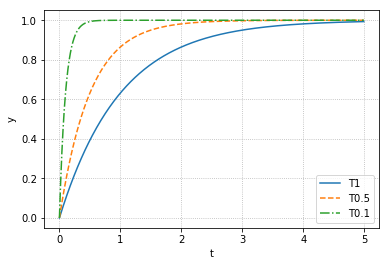

In [7]:
fig, ax = plt.subplots()
LS = linestyle_generator()

K = 1
T = (1,0.5,0.1)
for i in range(len(T)):
    y, t = step(tf([0,K],[T[i],1]), np.arange(0,5,0.01))
    ax.plot(t,y,ls = next(LS), label = "T"+str(T[i]))
plot_set(ax,"t","y","best")

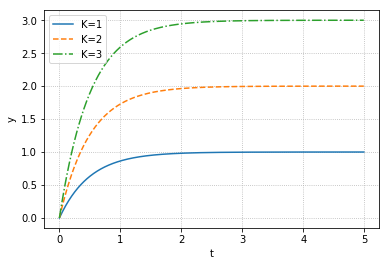

In [8]:
LS = linestyle_generator()
fig, ax = plt.subplots()

T = 0.5
K = [1, 2, 3]
for i in range(len(K)):
    y, t = step(tf([0,K[i]],[T,1]), np.arange(0, 5, 0.01))
    ax.plot(t,y,ls=next(LS),label="K="+str(K[i]))
plot_set(ax,"t","y","upper left")

In [9]:
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
T = sp.Symbol("T",real = True)
P = 1/((1+T*s)*s)
sp.apart(P,s)

In [11]:
t = sp.Symbol("t", positive=True)
sp.inverse_laplace_transform((1/s)-1/(s+1/T),s,T)

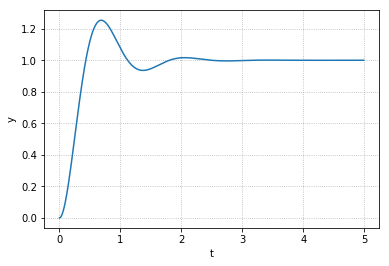

In [12]:
zeta, omega_n = 0.4,5

P = tf([0,omega_n**2], [1,2*zeta*omega_n,omega_n**2])
y, t = step(P, np.arange(0,5,0.01))

fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

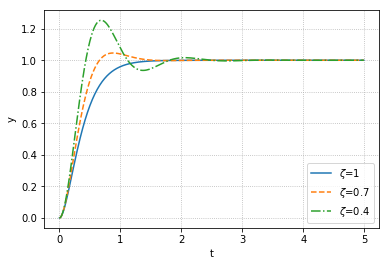

In [16]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = [1,0.7,0.4]
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2],[1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0,5,0.01))
    
    pltargs = {"ls":next(LS)}
    pltargs["label"] = "$\zeta$=" + str(zeta[i])
    ax.plot(t,y,**pltargs)
plot_set(ax, "t","y","best")

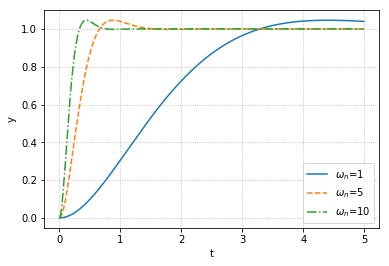

In [18]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = 0.7
omega_n = [1,5,10]

for i in range(len(omega_n)):
    P = tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    y, t = step(P, np.arange(0, 5 , 0.01))
    
    pltargs = {"ls": next(LS)}
    pltargs["label"] = "$\omega_n$=" + str(omega_n[i])
    ax.plot(t, y, **pltargs)
plot_set(ax, "t", "y", "best")

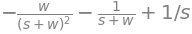

In [19]:
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
t = sp.Symbol("t",positive = True)
w = sp.Symbol("w",real = True)
P = sp.apart(w**2/(s*(s+w)**2),s)
P

In [20]:
sp.inverse_laplace_transform(P,s,t)

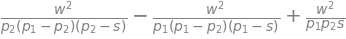

In [22]:
p1 = sp.Symbol("p1", real=True)
p2 = sp.Symbol("p2", real=True)
P = sp.apart(w**2/(s*(s-p1)*(s-p2)),s)
P

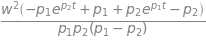

In [23]:
sp.inverse_laplace_transform(P, s, t)

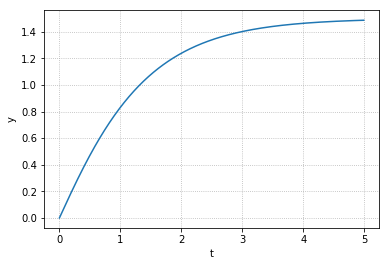

In [24]:
P = tf([1,3], [1,3,2])
y, t = step(P,np.arange(0,5,0.01))
fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

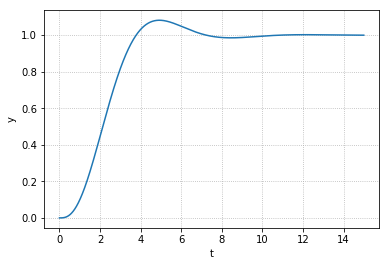

In [28]:
P = tf([0,1], [1,2,2,1])
y, t = step(P,np.arange(0,15,0.01))
fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")